**Fake News Detection**

In [6]:
pip install pandas

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


In [10]:
fake_df = pd.read_csv(r"C:\Users\ss\Documents\swathi\Data Science\ML\Fakenews\Fake.csv")
real_df = pd.read_csv(r"C:\Users\ss\Documents\swathi\Data Science\ML\Fakenews\True.csv")


In [12]:
#label the data
fake_df['label'] = 0  # 0 = Fake
real_df['label'] = 1  # 1 = Real


In [13]:
#combining 2 datasets
df = pd.concat([fake_df, real_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle


In [14]:
#structure of data
print(df.shape)



(44898, 5)


In [15]:
print(df['label'].value_counts())


label
0    23481
1    21417
Name: count, dtype: int64


In [16]:
print(df.isnull().sum())


title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [17]:
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [39]:
df.title[1]

'Trump drops Steve Bannon from National Security Council'

In [40]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['title'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])  # features
y = df['label']                                 # target


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#print(X_train)

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.9467706013363029

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4710
           1       0.93      0.96      0.94      4270

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



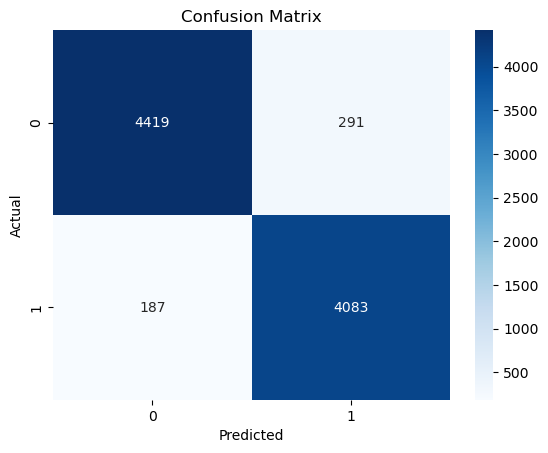

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**For Deployement we use Pickle to save file**

In [3]:
#pickle is used to save and load file whenever needed..it is usefulll bcz you don't need to retrain the modell everytime someone uses app
#it is train once ,pickle it,load pickle file and Done!...we can use wed page anytime :)

In [45]:
import pickle

with open("fake_news_model.pkl","wb") as f:
          pickle.dump(model,f)

In [46]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


In [48]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    transformed = vectorizer.transform([cleaned])
    pred = model.predict(transformed)[0]
    return "🟢 REAL News" if pred == 0 else "🔴 FAKE News"

# Try it
predict_news("Drinking bleach cures COVID-19 – experts confirm.")


'🔴 FAKE News'